In [1]:
import MoRIC_common_func as cf

In [2]:
directory = cf.format_path(r'E:\TW1Cont\MoRIC\Batch2_2112')
cf.enter_dir(directory)
p = cf.load_data_list('*.2CL')

File list loaded.


In [4]:
# Find coordinates at the centre of every frame and reorganize into a single dataframe, saving as pickle file
df_centre = cf.pd.DataFrame(columns=['Longitude', 'Latitude'])
for path in p:
    coor = cf.read_pds(path)[1]
    #print(coor)
    coor_centre = coor.iloc[[int(1088/2)]]
    df_centre.loc[path] = [coor_centre['Longitude'].values[0], coor_centre['Latitude'].values[0]]
    print('Added ' + path + ' centre coordinates to list')

df_centre.to_pickle(r'coor_centre')

Added HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211230222419_20211230222419_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0001_SCI_N_20211230222524_20211230222524_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0002_SCI_N_20211230222624_20211230222624_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0003_SCI_N_20211230222715_20211230222715_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0004_SCI_N_20211230222801_20211230222801_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0005_SCI_N_20211230222844_20211230222844_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0006_SCI_N_20211230222924_20211230222924_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0007_SCI_N_20211230223004_20211230223004_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0008_SCI_N_20211230223039_20211230223039_00734_A.2CL centre coordinates to list
Added HX1-Or_GRAS_MoRIC-F-0009_SCI_N_202112302

In [9]:
# Reading pickle stream of image coordinates
df_coor = cf.pd.read_pickle(r'coor_centre')

# Search for closest images in a defined radius around a POI (Point of Interest)
POI = 'Olympus Mons'
search_radius = 500
coor_POI = '18.65N, 133.8W'

print(f'POI: {POI}')
df_POI = cf.gen_coor(coor_POI)
print(f'Within a search radius of {search_radius} km around {POI}:')
dist_closest = cf.find_closest_images(df_POI, df_coor, search_radius=search_radius)
for key in dist_closest:
    print(f'{key} => {dist_closest[key]:.2f} km')
dist_closest_list = list(dist_closest.keys())

POI: Olympus Mons
Longitude: -133.8, Latitude: 18.65
Within a search radius of 500 km around Olympus Mons:
HX1-Or_GRAS_MoRIC-F-0003_SCI_N_20211230222715_20211230222715_00734_A.2CL => 38.71 km
HX1-Or_GRAS_MoRIC-F-0002_SCI_N_20211230222624_20211230222624_00734_A.2CL => 129.94 km
HX1-Or_GRAS_MoRIC-F-0004_SCI_N_20211230222801_20211230222801_00734_A.2CL => 198.70 km
HX1-Or_GRAS_MoRIC-F-0001_SCI_N_20211230222524_20211230222524_00734_A.2CL => 325.12 km
HX1-Or_GRAS_MoRIC-F-0005_SCI_N_20211230222844_20211230222844_00734_A.2CL => 349.23 km
HX1-Or_GRAS_MoRIC-F-0006_SCI_N_20211230222924_20211230222924_00734_A.2CL => 491.67 km


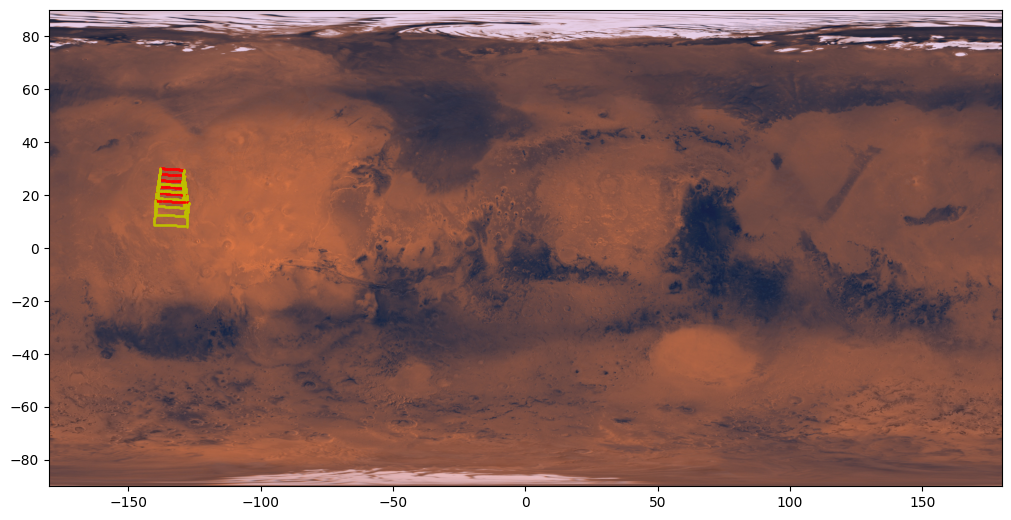

In [12]:
# Preview boundaries associated with the closest images
layout = [['Map']]
gs_kw = dict(width_ratios=[1], height_ratios=[1])
path_map = cf.format_path(r'E:\TW1Cont\MoRIC\Mars_Viking_ClrMosaic_global_925m-2.jpg')

fig_map, axes = cf.create_plot_layout(layout, gs_kw, figsize=(10, 10))
cf.plot_base_map(axes['Map'], path_map)
for path in dist_closest:
    coor = cf.read_pds(path)[1]
    #print(coor)
    upper, other = cf.prune_coor(coor)
    #print('Plotting ' + path)
    cf.plot_coor(axes['Map'], upper, other)

cf.plt.show()
#cf.plt.close()

In [13]:
cf.export_image_list(dist_closest_list, POI)

Creating subfolder POI Batch - Olympus Mons
Processing and exporting file (1) HX1-Or_GRAS_MoRIC-F-0003_SCI_N_20211230222715_20211230222715_00734_A
DONE
Processing and exporting file (2) HX1-Or_GRAS_MoRIC-F-0002_SCI_N_20211230222624_20211230222624_00734_A
DONE
Processing and exporting file (3) HX1-Or_GRAS_MoRIC-F-0004_SCI_N_20211230222801_20211230222801_00734_A
DONE
Processing and exporting file (4) HX1-Or_GRAS_MoRIC-F-0001_SCI_N_20211230222524_20211230222524_00734_A
DONE
Processing and exporting file (5) HX1-Or_GRAS_MoRIC-F-0005_SCI_N_20211230222844_20211230222844_00734_A
DONE
Processing and exporting file (6) HX1-Or_GRAS_MoRIC-F-0006_SCI_N_20211230222924_20211230222924_00734_A
DONE
